# Importing Packages

Let's start by importing required packages. **os** package is used to read files and directory structure, **numpy** is used to convert python list to numpy array and to perform required matrix operations and **matplotlib.pyplot** is used to plot the graph and display images in our training and validation data.

In [ ]:
import os
import numpy as np
import glob
import shutil

import tensorflow as tf

import matplotlib.pyplot as plt

### TODO: Import TensorFlow and Keras Layers

In the cell below, import Tensorflow as `tf` and the Keras layers and models you will use to build your CNN. Also, import the `ImageDataGenerator` from Keras so that you can perform image augmentation.

In [ ]:
#import packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Loading

In order to build our image classifier, we can begin by downloading the flowers dataset. We first need to download the archive version of the dataset and after the download we are storing it to "/tmp/" directory.

After downloading the dataset, we need to extract its contents.

In [ ]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228818944/228813984 [==============================] - 5s 0us/step


The dataset we downloaded contains images of 5 types of flowers:

1. Rose
2. Daisy
3. Dandelion
4. Sunflowers
5. Tulips

So, let's create the labels for these 5 classes: 

In [ ]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [ ]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


For convenience, let us set up the path for the training and validation sets

In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

train_roses_dir = os.path.join(train_dir, 'roses')  # directory with our training roses pictures
train_daisy_dir = os.path.join(train_dir, 'daisy')  # directory with our training daisy pictures
train_dandelion_dir = os.path.join(train_dir, 'dendelion')  # directory with our dandelion cat pictures
train_sunflowers_dir = os.path.join(train_dir, 'sunflowers')  # directory with our training sunflowers pictures
train_tulips_dir = os.path.join(train_dir, 'tulips')  # directory with our training tulips pictures

validation_roses = os.path.join(validation_dir, 'roses')  # directory with our validation roses pictures
validation_daisy = os.path.join(validation_dir, 'daisy')  # directory with our validation daisy pictures
validation_dandelion_dir = os.path.join(validation_dir, 'dandelion')  # directory with our dandelion cat pictures
validation_sunflowers_dir = os.path.join(validation_dir, 'sunflowers')  # directory with our validation sunflowers pictures
validation_tulips_dir = os.path.join(validation_dir, 'tulips')  # directory with our validation tulips pictures




In [ ]:
BATCH_SIZE = 100
IMG_SHAPE = 150

 Apply Random Horizontal Flip

In the cell below, use ImageDataGenerator to create a transformation that rescales the images by 255 and then applies a random horizontal flip. Then use the `.flow_from_directory` method to apply the above transformation to the images in our training set. Make sure you indicate the batch size, the path to the directory of the training images, the target size for the images, and to shuffle the images. 

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

image_gen_val = ImageDataGenerator(rescale=1./255)
validation_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=validation_dir,
                                               shuffle=False,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2935 images belonging to 5 classes.
Found 735 images belonging to 5 classes.


Let's take 1 sample image from our training examples and repeat it 5 times so that the augmentation can be applied to the same image 5 times over randomly, to see the augmentation in action.

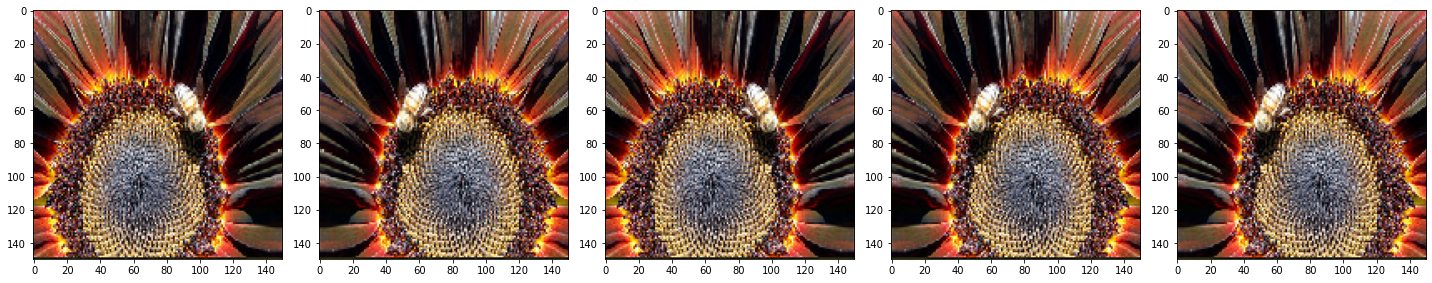

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

 Apply Random Rotation

In the cell below, use ImageDataGenerator to create a transformation that rescales the images by 255 and then applies a random 45 degree rotation. Then use the `.flow_from_directory` method to apply the above transformation to the images in our training set. Make sure you indicate the batch size, the path to the directory of the training images, the target size for the images, and to shuffle the images. 

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range= 45)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

image_gen_val = ImageDataGenerator(rescale=1./255)
validation_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=validation_dir,
                                               shuffle=False,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2935 images belonging to 5 classes.
Found 735 images belonging to 5 classes.


Let's take 1 sample image from our training examples and repeat it 5 times so that the augmentation can be applied to the same image 5 times over randomly, to see the augmentation in action.

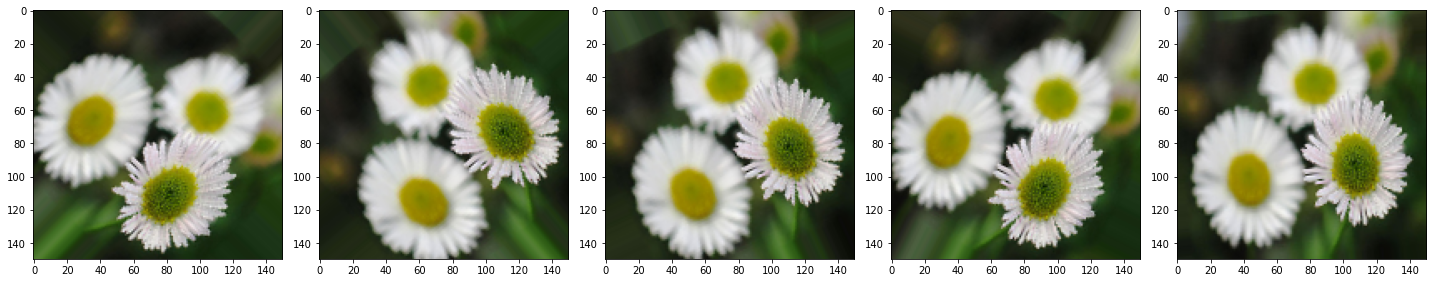

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

 Apply Random Zoom

In the cell below, use ImageDataGenerator to create a transformation that rescales the images by 255 and then applies a random zoom of up to 50%. Then use the `.flow_from_directory` method to apply the above transformation to the images in our training set. Make sure you indicate the batch size, the path to the directory of the training images, the target size for the images, and to shuffle the images. 

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range = 0.5)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))


Found 2935 images belonging to 5 classes.


Let's take 1 sample image from our training examples and repeat it 5 times so that the augmentation can be applied to the same image 5 times over randomly, to see the augmentation in action.

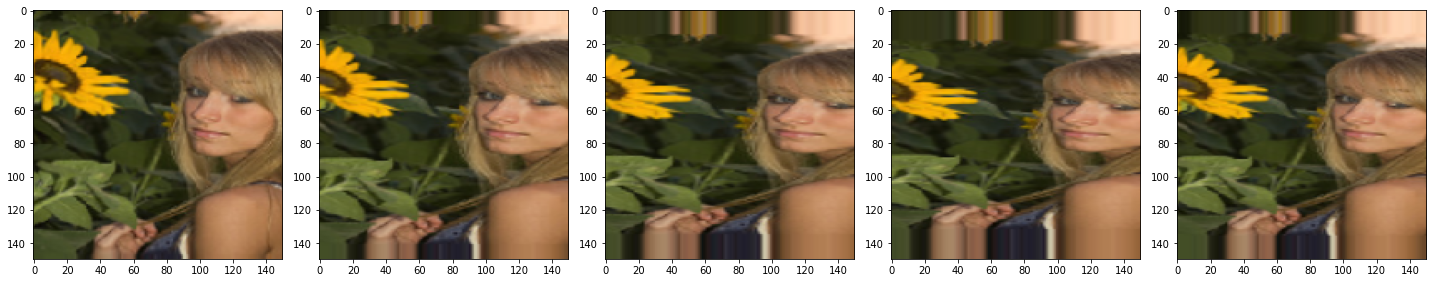

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

 Put It All Together

In the cell below, use ImageDataGenerator to create a transformation that rescales the images by 255 and that applies:

- random 45 degree rotation
- random zoom of up to 50%
- random horizontal flip
- width shift of 0.15
- height shift of 0.15

Then use the `.flow_from_directory` method to apply the above transformation to the images in our training set. Make sure you indicate the batch size, the path to the directory of the training images, the target size for the images, to shuffle the images, and to set the class mode to `sparse`.

In [ ]:
image_gen_train = ImageDataGenerator(rescale= 1./255, horizontal_flip= True, rotation_range= 45, zoom_range= 0.5, width_shift_range= 0.15, height_shift_range= 0.15 )


train_data_gen = image_gen_train.flow_from_directory(batch_size= BATCH_SIZE,
                                                     directory= train_dir,
                                                     shuffle = True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2935 images belonging to 5 classes.


Let's visualize how a single image would look like 5 different times, when we pass these augmentations randomly to our dataset. 

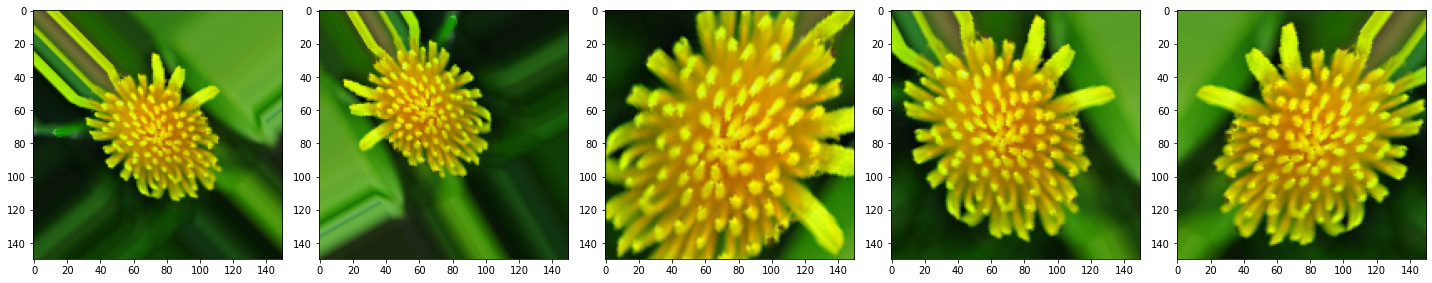

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Create a Data Generator for the Validation Set

Generally, we only apply data augmentation to our training examples. So, in the cell below, use ImageDataGenerator to create a transformation that only rescales the images by 255. Then use the `.flow_from_directory` method to apply the above transformation to the images in our validation set. Make sure you indicate the batch size, the path to the directory of the validation images, the target size for the images, and to set the class mode to `sparse`. Remember that it is not necessary to shuffle the images in the validation set. 

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)
validation_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=validation_dir,
                                               shuffle=False,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 735 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation= 'softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)       

In [ ]:
epochs = 80
history =  model.fit_generator(
    train_data_gen,
    steps_per_epoch = int(np.ceil(2935/float(BATCH_SIZE))),
    epochs=epochs,
    validation_data = validation_data_gen,
    validation_steps = int(np.ceil(735/float(BATCH_SIZE)))
)

30/30 [==============================] - 23s 762ms/step - loss: 0.4494 - accuracy: 0.8293 - val_loss: 0.7121 - val_accuracy: 0.7442
Epoch 69/80
30/30 [==============================] - 22s 745ms/step - loss: 0.4560 - accuracy: 0.8225 - val_loss: 0.6519 - val_accuracy: 0.7714
Epoch 70/80
30/30 [==============================] - 24s 808ms/step - loss: 0.4451 - accuracy: 0.8293 - val_loss: 0.6988 - val_accuracy: 0.7347
Epoch 71/80
30/30 [==============================] - 22s 747ms/step - loss: 0.4333 - accuracy: 0.8361 - val_loss: 0.6841 - val_accuracy: 0.7646
Epoch 72/80
30/30 [==============================] - 22s 744ms/step - loss: 0.4432 - accuracy: 0.8337 - val_loss: 0.7539 - val_accuracy: 0.7224
Epoch 73/80
30/30 [==============================] - 24s 803ms/step - loss: 0.4766 - accuracy: 0.8123 - val_loss: 0.6389 - val_accuracy: 0.7714
Epoch 74/80
30/30 [==============================] - 22s 740ms/step - loss: 0.4652 - accuracy: 0.8225 - val_loss: 0.7279 - val_accuracy: 0.7252
Epoc

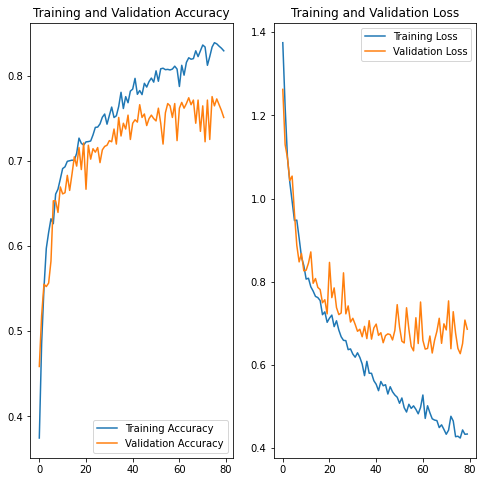

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



